bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.001_0.005


/home/fsimone/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log


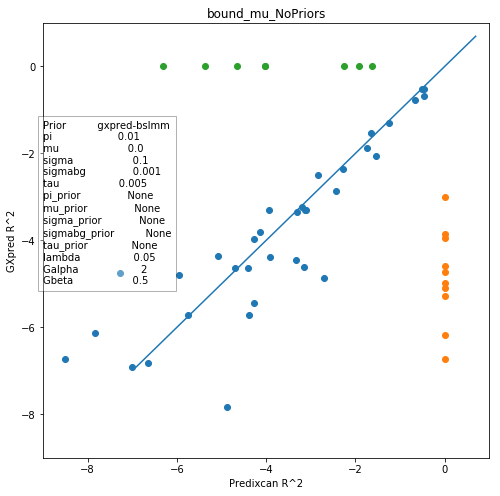

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.010_0.100_0.005


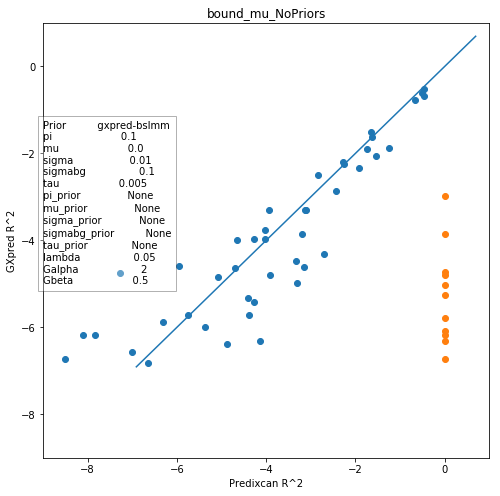

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.010_0.005


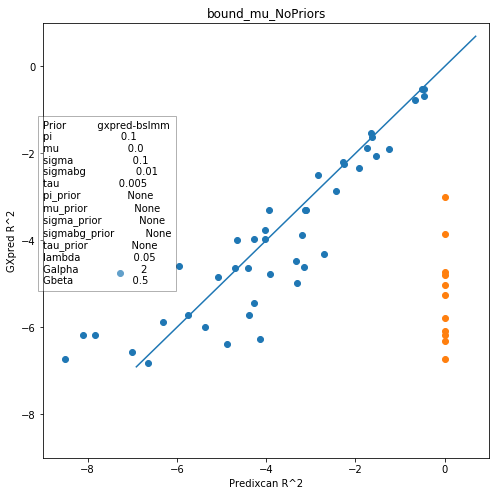

bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.100_0.005


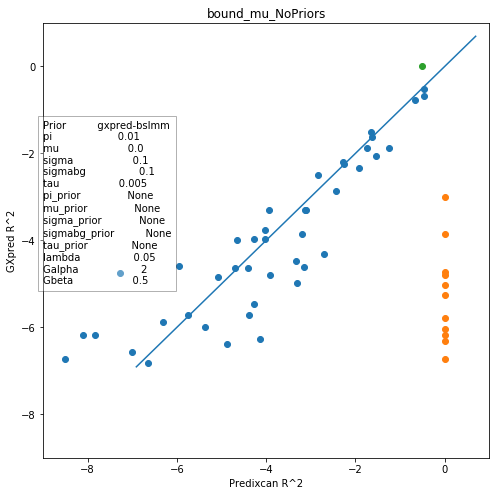

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.500_0.500_0.005


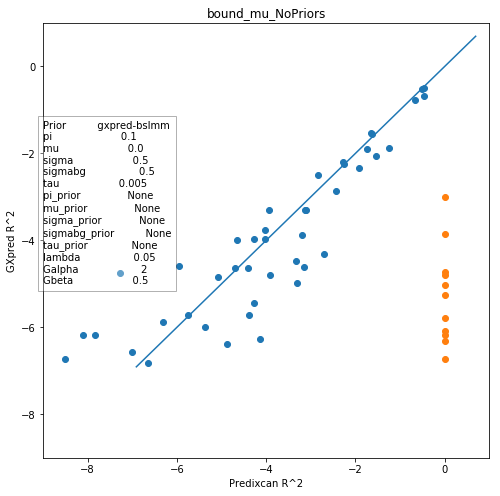

bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.010_0.005


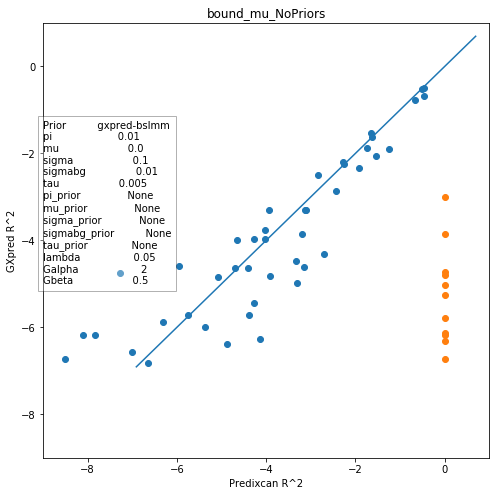

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.100_0.005


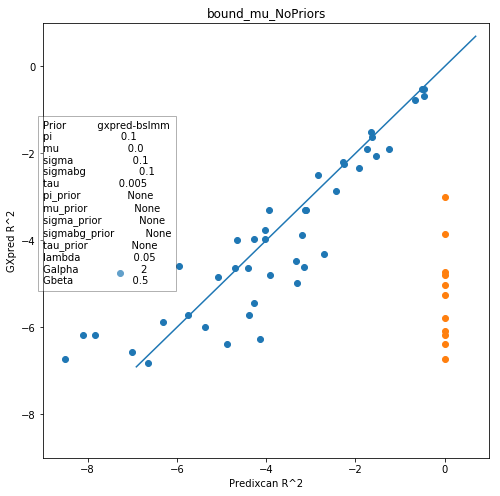

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.100_0.001_0.005


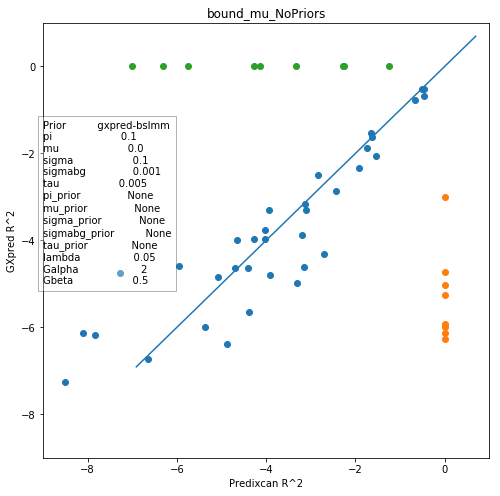

bound_mu_NoPriors gxpred-bslmm_0.100_0.000_0.010_0.001_0.005


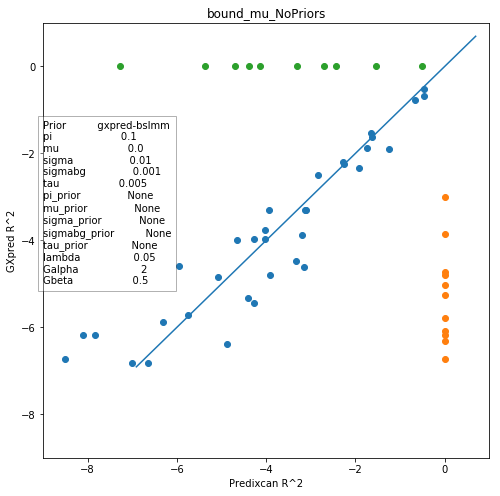

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


results_dir = "z1"

dirs = os.listdir(results_dir)

for d in dirs:
    subdirs = os.listdir(os.path.join(results_dir,d))
    for sd in subdirs:
        print(d, sd)
        df = pd.read_table(os.path.join(results_dir,d,sd,"genes_r2.txt"), header=0)
        params = pd.read_table(os.path.join(results_dir,d,sd,"params.txt"), header=None, index_col=0)
        # text = "\n".join(["\t".join([i,str(params.loc[i])]) for i in params.index])
        text = params.to_string(header=None, index_names=False, justify="left")
        #if float(params.loc["lambda"]) > 0.01:
        #    continue
        fig = plt.figure(figsize=(8,8))
        px_nan = df["predixcan"].isna()
        gx_nan = df["gxpred-bslmm"].isna()
        
        px_points = df[gx_nan]["predixcan"]
        gx_points = df[px_nan]["gxpred-bslmm"]
        
        ax = fig.add_subplot(111)
        ax.scatter(np.log(df["predixcan"]), np.log(df["gxpred-bslmm"]))
        ax.plot([np.log(0.001),np.log(2)], [np.log(0.001),np.log(2)])
        ax.scatter( np.repeat(0,len(gx_points)), np.log(gx_points))
        ax.scatter( np.log(px_points), np.repeat(0,len(px_points)))
        ax.set_xlabel('Predixcan R^2')
        ax.set_ylabel('GXpred R^2')
        ax.set_title(d)
        ax.set_xlim([-9,1])
        ax.set_ylim([-9,1])
        ax.text(-9, -5, text, bbox={'facecolor':'white','alpha':0.3, 'pad':5})
        plt.show()
        #raise

In [3]:
results_dir = "z1"

dirs = os.listdir(results_dir)

from collections import defaultdict

failures = defaultdict(list)
by_prior = defaultdict(list)

prev_df = np.array([])
for prior in dirs:
    counter = 0
    subdirs = os.listdir(os.path.join(results_dir,prior))
    for sd in subdirs:
        # print(prior, sd)
        df = pd.read_table(os.path.join(results_dir,prior,sd,"genes_r2.txt"), header=0)
        newcolname = prior+"_"+str(counter)
        df=df.rename(columns = {'gxpred-bslmm':newcolname})
        print(counter,prior,sd,"\t","Failures: ",np.sum(~df.Success))
        
        failures[sd].append({d:np.sum(~df.Success)})
        print(df[["Ensembl_ID",newcolname]])
        counter += 1
        if prev_df.shape[0] == 0:
            prev_df = df[["Ensembl_ID",newcolname]]
            continue
        prev_df = prev_df.merge(df[["Ensembl_ID",newcolname]], on="Ensembl_ID", how="outer")

0 bound_mu_NoPriors gxpred-bslmm_0.010_0.000_0.100_0.001_0.005 	 Failures:  8
         Ensembl_ID  bound_mu_NoPriors_0
0   ENSG00000151065               0.0000
1   ENSG00000078237               0.0010
2   ENSG00000139194               0.0022
3   ENSG00000173262               0.0011
4   ENSG00000171860               0.5977
5   ENSG00000205846                  NaN
6   ENSG00000166527                  NaN
7   ENSG00000256660               0.2180
8   ENSG00000172243               0.0364
9   ENSG00000139112               0.0082
10  ENSG00000013583               0.0398
11  ENSG00000123104               0.0210
12  ENSG00000064115               0.2723
13  ENSG00000139117                  NaN
14  ENSG00000139174               0.0502
15  ENSG00000161800               0.0001
16  ENSG00000139610               0.5052
17  ENSG00000167612               0.0012
18  ENSG00000123395               0.0086
19  ENSG00000170486               0.0033
20  ENSG00000185640               0.0021
21  ENSG00000135476 

In [4]:
failures


defaultdict(list,
            {'gxpred-bslmm_0.010_0.000_0.100_0.001_0.005': [{'bound_mu_NoPriors': 8}],
             'gxpred-bslmm_0.010_0.000_0.100_0.010_0.005': [{'bound_mu_NoPriors': 0}],
             'gxpred-bslmm_0.010_0.000_0.100_0.100_0.005': [{'bound_mu_NoPriors': 1}],
             'gxpred-bslmm_0.100_0.000_0.010_0.001_0.005': [{'bound_mu_NoPriors': 10}],
             'gxpred-bslmm_0.100_0.000_0.010_0.100_0.005': [{'bound_mu_NoPriors': 0}],
             'gxpred-bslmm_0.100_0.000_0.100_0.001_0.005': [{'bound_mu_NoPriors': 12}],
             'gxpred-bslmm_0.100_0.000_0.100_0.010_0.005': [{'bound_mu_NoPriors': 0}],
             'gxpred-bslmm_0.100_0.000_0.100_0.100_0.005': [{'bound_mu_NoPriors': 0}],
             'gxpred-bslmm_0.100_0.000_0.500_0.500_0.005': [{'bound_mu_NoPriors': 0}]})

/home/fsimone/myenv/lib/python3.6/site-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


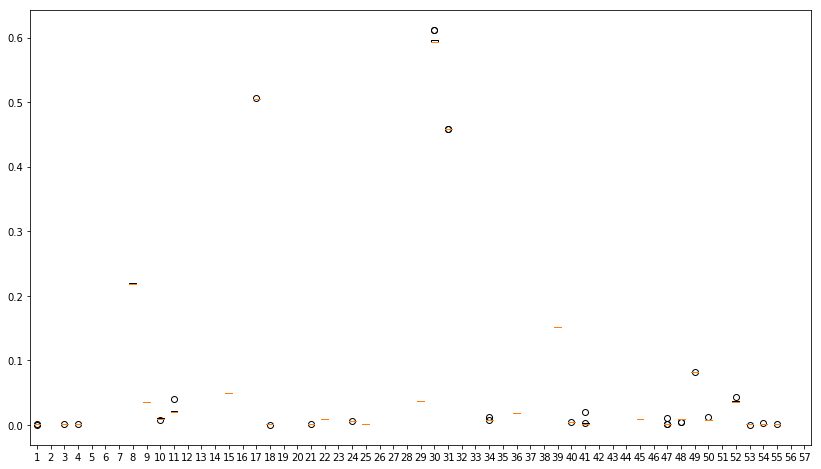

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# plt.boxplot(data)
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
ax.boxplot(prev_df.iloc[:,1:10])
plt.show()